<a href="https://colab.research.google.com/github/szn5400/CO2_all/blob/main/Data_Analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is for visualization of the 3D heterogenous toy dataset.

Each section has been commented on what it is doing.

First, we are loading the data as shown below and extracting the un-normalized values of pressure, saturation and water output

In [1]:
# This is code for visulazing the 3D Toy dataset and getting cleared on its structure

# Below code sets the path to the dataset. Please set the path as required from your system. The data are available at "https://github.com/sumedha29/Co2_Sequestration/tree/main/data"
import sys
sys.path.append('/content/drive/MyDrive/code/MLP')

# The below mentioned files are available in the Git repo. As the file names are self explanatory, 'read_data_unscaled' reads the data from the file
# 'read_model' reads the model from that file. The models are MLP STT, MLP MTT and MLP PINN
# 'data_to_numpy_unscaled' converts the read data to numpy arrays, without scaling
# 
from read_data_unscaled import read
import os
import numpy as np
import glob
import collections
from read_model import MLP_single
from data_to_numpy_unscaled import numpy_single
from data_to_numpy_raw import numpy_single_raw

#read data
all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs = read()


features1_tr_raw,target1_tr_raw,features1_te_raw,target1_te_raw,permeability_min_raw,permeability_max_raw,porosity_min_raw,porosity_max_raw,surf_inj_rate_min_raw,surf_inj_rate_max_raw,min_target_raw,max_target_raw = numpy_single_raw(all_pressures,all_saturations,all_permeabilities,all_porosities,all_surf_inj_rate_series,all_surf_prod_rate_series,Ks,Rs,all_pressures)


All files: ['/content/drive/MyDrive/data/k1r1-h.out', '/content/drive/MyDrive/data/k1r2-h.out', '/content/drive/MyDrive/data/k1r3-h.out', '/content/drive/MyDrive/data/k1r4-h.out', '/content/drive/MyDrive/data/k1r5-h.out', '/content/drive/MyDrive/data/k1r6-h.out', '/content/drive/MyDrive/data/k1r7-h.out', '/content/drive/MyDrive/data/k1r8-h.out', '/content/drive/MyDrive/data/k1r9-h.out', '/content/drive/MyDrive/data/k2r1-h.out', '/content/drive/MyDrive/data/k2r2-h.out', '/content/drive/MyDrive/data/k2r3-h.out', '/content/drive/MyDrive/data/k2r4-h.out', '/content/drive/MyDrive/data/k2r5-h.out', '/content/drive/MyDrive/data/k2r6-h.out', '/content/drive/MyDrive/data/k2r7-h.out', '/content/drive/MyDrive/data/k2r8-h.out', '/content/drive/MyDrive/data/k2r9-h.out', '/content/drive/MyDrive/data/k3r1-h.out', '/content/drive/MyDrive/data/k3r2-h.out', '/content/drive/MyDrive/data/k3r3-h.out', '/content/drive/MyDrive/data/k3r4-h.out', '/content/drive/MyDrive/data/k3r5-h.out', '/content/drive/MyDriv

Raw data has been read. Now plotting Permeability in log scale

In [2]:
import matplotlib.pyplot as plt
def display_permeability_data(realization, timestamp, input):
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = np.log10(input[realization][timestamp][i][j][0])
          plot_y_target[i][j] = np.log10(input[realization][timestamp][i][j][1])
          plot_z_target[i][j] = np.log10(input[realization][timestamp][i][j][2])

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.clim(-0.5,2.0)
  plt.show()
  

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.clim(-0.5,2.0)
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.clim(-0.5,2.0)
  plt.show()
  

You can vary the realization and timestamp as wished, to get the plots of any timestep and realization from 71 timesteps and 27 realizations

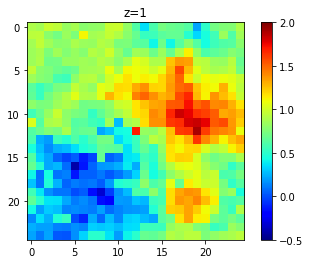

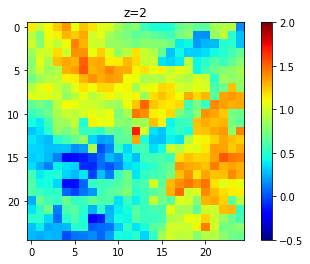

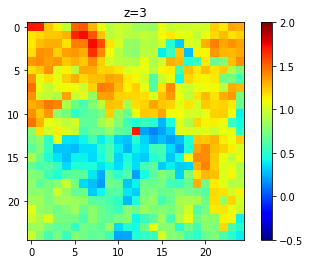

In [3]:
realization = 1
timestamp = 60

display_permeability_data(realization,timestamp,all_permeabilities)

Plotting Porosity for check

In [5]:
def display_porosity_data(realization, timestamp, input):
  plot_x_target = [[0 for i in range(25)] for j in range(25)]
  plot_y_target = [[0 for i in range(25)] for j in range(25)]
  plot_z_target = [[0 for i in range(25)] for j in range(25)]

  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = (input[realization][timestamp][i][j][0])
          plot_y_target[i][j] = (input[realization][timestamp][i][j][1])
          plot_z_target[i][j] = (input[realization][timestamp][i][j][2])

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  

You can vary the realization and timestamp as wished, to get the plots of any timestep and realization from 71 timesteps and 27 realizations

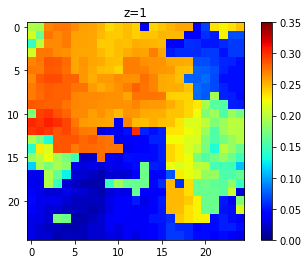

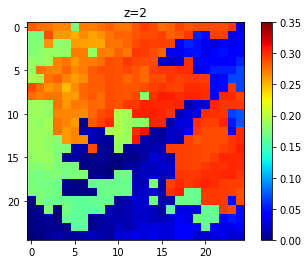

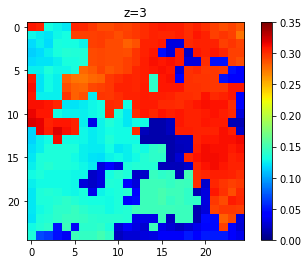

In [6]:
realization = 1
timestamp = 60

display_porosity_data(realization,timestamp,all_porosities)

Following plot analyzes if there is any difference between timesteps of permeability

Basically, it gets the difference in values between two timesteps of the data to see if there is any variation of the data

In [7]:
def display_permeability_data_dif(realization, i, j, input):
  plot_x_target = [0 for j in range(70)]
  plot_y_target = [0 for j in range(70)]
  plot_z_target = [0 for j in range(70)]

  #plot_x_target[0] = 0
  #plot_y_target[0] = 0
  #plot_z_target[0] = 0

  for t in range(1,70):
    plot_x_target[t-1] = input[realization][t][i][j][0]-input[realization][t-1][i][j][0]
    plot_y_target[t-1] = input[realization][t][i][j][1]-input[realization][t-1][i][j][1]
    plot_z_target[t-1] = input[realization][t][i][j][2]-input[realization][t-1][i][j][2]
  '''
  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = (input[realization][timestamp][i][j][0])
          plot_y_target[i][j] = (input[realization][timestamp][i][j][1])
          plot_z_target[i][j] = (input[realization][timestamp][i][j][2])
  

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  '''
  x = np.linspace(start=1,stop=70,num=70)

  plt.plot(x,plot_x_target)
  plt.title("Z=1 errors")
  plt.show()

  plt.plot(x,plot_y_target)
  plt.title("Z=2 errors")
  plt.show()

  plt.plot(x,plot_z_target)
  plt.title("Z=3 errors")
  plt.show()

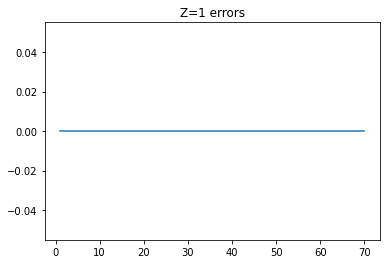

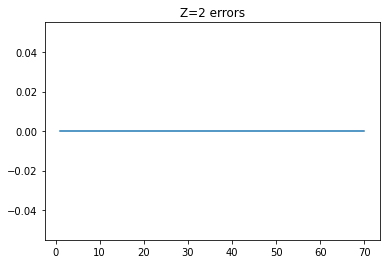

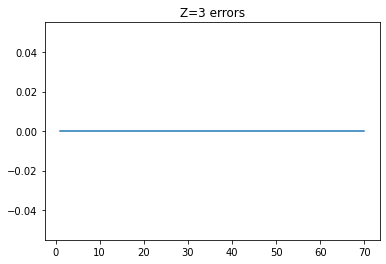

In [8]:
realization = 5
i = 15
j = 10

display_permeability_data_dif(realization,i,j,all_permeabilities)

Plotting Differences for Porosity


In [9]:
def display_porosity_data_dif(realization, i, j, input):
  plot_x_target = [0 for j in range(70)]
  plot_y_target = [0 for j in range(70)]
  plot_z_target = [0 for j in range(70)]

  #plot_x_target[0] = 0
  #plot_y_target[0] = 0
  #plot_z_target[0] = 0

  for t in range(1,70):
    plot_x_target[t-1] = input[realization][t][i][j][0]-input[realization][t-1][i][j][0]
    plot_y_target[t-1] = input[realization][t][i][j][1]-input[realization][t-1][i][j][1]
    plot_z_target[t-1] = input[realization][t][i][j][2]-input[realization][t-1][i][j][2]
  '''
  for i in range(25):
      for j in range(25):
        for k in range(3):
          plot_x_target[i][j] = (input[realization][timestamp][i][j][0])
          plot_y_target[i][j] = (input[realization][timestamp][i][j][1])
          plot_z_target[i][j] = (input[realization][timestamp][i][j][2])
  

  plt.imshow(np.squeeze(plot_x_target), cmap="jet")
  plt.title("z=1")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  

  plt.imshow(np.squeeze(plot_y_target), cmap="jet")
  plt.title("z=2")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()

  plt.imshow(np.squeeze(plot_z_target), cmap="jet")
  plt.title("z=3")
  plt.colorbar()
  plt.clim(0.0,0.35)
  plt.show()
  '''
  x = np.linspace(start=1,stop=70,num=70)

  plt.plot(x,plot_x_target)
  plt.title("Z=1 errors")
  plt.show()

  plt.plot(x,plot_y_target)
  plt.title("Z=2 errors")
  plt.show()

  plt.plot(x,plot_z_target)
  plt.title("Z=3 errors")
  plt.show()

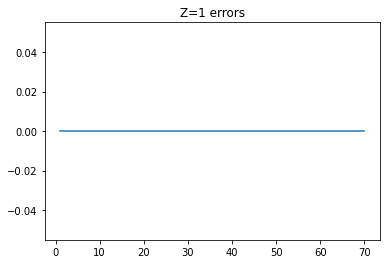

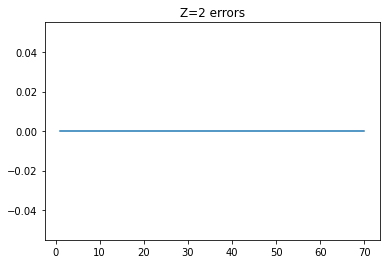

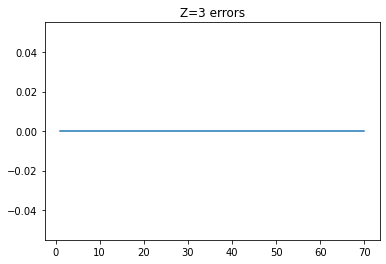

In [10]:
realization = 5
i = 15
j = 9

display_porosity_data_dif(realization,i,j,all_porosities)

Next, you can plot the datapoint magnitude for any number of datachunks by varying the numbers below. I have shown it for gas pressure. The same can be accomplished for other data as required.

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(start=0,stop=10,num=133125*5)

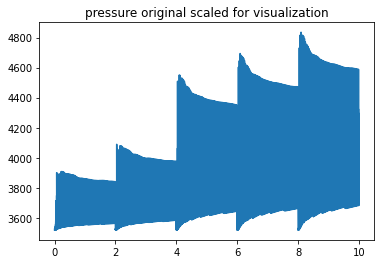

In [15]:
get_pressure = target1_tr_raw[0:133125*5]
plt.plot(x,get_pressure)
plt.title("pressure original scaled for visualization")
plt.show()